In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
prediction = np.loadtxt("../predictions.txt", dtype=str)
truth = np.loadtxt("../truth.txt", dtype=str)

In [3]:
def transform_labels(labels):
    for i in range(len(labels)):
        if (labels[i] == 'Sith'):
            labels[i] = 0
        else:
            labels[i] = 1
    return labels


truth = transform_labels(truth)
prediction = transform_labels(prediction)

In [4]:
def getConfusionMatrix(truth: np.array, pred: np.array):
    Tp = Tn = Fp = Fn = 0
    for i in range(len(truth)):
        if (truth[i] == "0" and pred[i] == "0"):
            Tn += 1
        elif (truth[i] == "0" and pred[i] == "1"):
            Fp += 1
        elif (truth[i] == "1" and pred[i] == "1"):
            Tp += 1
        elif (truth[i] == "1" and pred[i] == "0"):
            Fn += 1
    accuracy = (Tp + Tn) / (Tp + Tn + Fp + Fn)
    pres = (Tp / (Tp + Fp))
    recall = (Tp / (Tp + Fn))
    f1_score = (2 * Tp) / (2 * Tp + Fp + Fn)
    
    return [[Tp, Fn], [Fp, Tn]], (accuracy, pres, recall, f1_score)

In [5]:
conf_matrix, stats = getConfusionMatrix(truth, prediction)
print(conf_matrix)

[[25, 24], [30, 21]]


<Axes: >

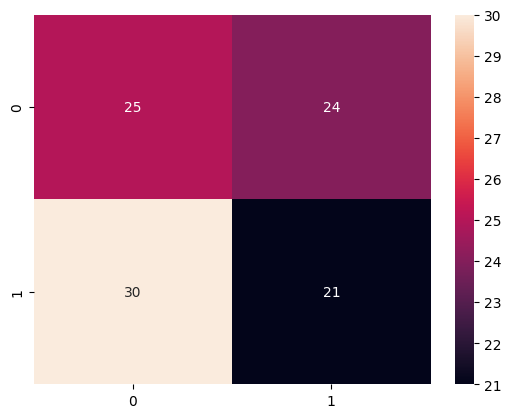

In [6]:
sns.heatmap(conf_matrix, annot=True, fmt='d')

In [7]:
class_recall = []
for class_ in np.unique(truth):
    class_acc = np.mean(prediction[truth == class_] == class_)
    class_recall.append(class_acc)

In [12]:
prec2 = 1 - (conf_matrix[1][0] / (conf_matrix[1][0] + conf_matrix[0][0]))

In [9]:
f1_score2 = 1 - (2 * conf_matrix[1][0]) / (2 * conf_matrix[1][0] + conf_matrix[0][0] + conf_matrix[0][1])

In [13]:
print(f"Jedi \nprecision: {round(stats[1], 2)}, recall: {round(stats[2], 2)}, F1 score: {round(stats[3], 2)}, total", conf_matrix[0][0] + conf_matrix[0][1])
print(f"Sith \nprecision: {round(prec2, 2)}, recall: {round(class_recall[0], 2)}, F1 score: {round(f1_score2, 2)}, total", conf_matrix[1][0] + conf_matrix[1][1])
print(f"Global accuracy: {stats[0]}")

Jedi 
precision: 0.45, recall: 0.51, F1 score: 0.48, total 49
Sith 
precision: 0.45, recall: 0.41, F1 score: 0.45, total 51
Global accuracy: 0.46


In [11]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(truth, prediction)

(array([0.46666667, 0.45454545]),
 array([0.41176471, 0.51020408]),
 array([0.4375    , 0.48076923]),
 array([51, 49], dtype=int64))